In [80]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
from IPython.display import display
plt.style.use('ggplot')

def contains(x,y):
    try:
        float(x)
    except:
        return False

    try:
        float(y)
    except:
        return False

    X = float(x)
    Y = float(x)
    p=Point(X,Y)
    #print (shenzhen.contains(p))
    return shenzhen.contains(p)

def calcDist(x,y):
    R = 6373.0

    dlon = radians(y[1] - x[1])
    dlat = radians(y[0] - x[0])
    a = (sin(dlat/2))**2 + cos(radians(x[0])) * cos(radians(y[0])) * (sin(dlon/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    ### RETORNA A DISTANCIA EM METROS
    return distance*1000

def calcAngle(x,y):
    R = 6373.0

    dlon = radians(y[1] - x[1])
    dlat = radians(y[0] - x[0])
    a = cos(radians(y[0]))*sin(dlon)
    b = cos(radians(x[0]))*sin(radians(y[0])) - sin(radians(x[0]))*cos(radians(y[0]))*cos(dlon)
    c = atan2(a,b)
    return c

def hourAssign(data):
    hours = [0 for x in range(24)]
    userold = '0'
    for i in data:
        if type(i)<>type(1.0):
            hour = i.split(':')
            if len(hour)<>3:
                user = hour
                continue
            elif user <> userold:
                hours[int(hour[0])]+=1
                userold = user
        else: continue
    return hours

def handoverAssign(x):
    handover = []
    for i in range(1,len(x)):
        if x[i-1][1][0][0]<>x[i][1][0][0]:
            handover.append((x[i-1][1][0][0],[x[i][0]]))
        else:
            continue
    return handover

def hourAssign3(data):
    hours = [0 for x in range(24)]
    for i in data:
        hour = i.split(':')
        hours[int(hour[0])]+=1
    return hours

def loadErbs():
    shenzhen = Polygon([(22.734573, 113.763943),
                        (22.450680, 113.886438),
                        (22.604638, 114.414178),
                        (22.446780, 114.506558),
                        (22.506541, 114.628048),
                        (22.656394, 114.593470),
                        (22.805185, 114.346804),
                        (22.778334, 114.184327),
                        (22.659406, 114.175405),
                        (22.842981, 113.882361)])

    counter = 0
    erbs = []
    for i in ["454.csv","455.csv","460.csv"]:
        f = open(i)
        f.readline()
        for j in f:
            line = j.strip('\n').split(",")
            p = Point(float(line[7]),float(line[6]))
            if shenzhen.contains(p):
                erbs.append(line)
                counter += 1
    print(counter)

    rddErbs = sc.parallelize(erbs)
    coordErbs = rddErbs.map(lambda x: (x[4],float(x[7]),float(x[6]),float(x[8]),x[0]))
    
    return coordErbs

In [43]:
def calcDist(x,y):
    R = 6373.0

    dlon = radians(y[1] - x[1])
    dlat = radians(y[0] - x[0])
    a = (sin(dlat/2))**2 + cos(radians(x[0])) * cos(radians(y[0])) * (sin(dlon/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    ### RETORNA A DISTANCIA EM METROS
    return distance*1000

x_widget = widgets.IntSlider(min=0, max=23, step=1)

def att(x):
    if x < 10:
        return '0'+str(x)
    return str(x)

def printer(x):
    return(x)
    
hora = interactive(att, x=x_widget)
dataset = interactive(printer, x=['phone','taxi','bus','truck'])
padrao = interactive(printer, x=['none','LTE','GSM','UMTS'])
metrica = interactive(printer, x=['celulas','usuarios','handover','posicoes'])

display(hora)
display(dataset)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGlvbj11J3gnLCBtYXg9MjMpLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz0odSd3aWRnZXQtaW50ZXJhY3TigKY=


aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUneCcsIG9wdGlvbnM9KCdwaG9uZScsICd0YXhpJywgJ2J1cycsICd0cnVjaycpLCB2YWx1ZT0ncGhvbmUnKSwgT3XigKY=


In [62]:
def createRddDataset(key1, key2):
    rddPhoneStr = sc.emptyRDD()
    if key2 == 'phone':
            cor = 'purple'
            filename = "PhoneData.csv"
            rddPhone = sc.textFile(filename)
            rddPhoneStr = rddPhone.map(lambda x: x.strip('\n').split(","))\
                        .filter(lambda x: x[1].split(":")[0] == key1)\
                        .map(lambda x: (x[0],x[1],float(x[3]),float(x[2])))

    elif key2 == 'taxi':
        cor = 'red'
        filename = "TaxiData.csv"
        rddPhone = sc.textFile(filename)
        rddPhoneStr = rddPhone.map(lambda x: x.strip('\n').split(","))\
                    .filter(lambda x: x[1].split(":")[0] == key1)\
                    .map(lambda x: (x[0],x[1],float(x[3]),float(x[2])))

    elif key2 == 'bus':
        cor = 'blue'
        filename = "BusData.csv"
        rddPhone = sc.textFile(filename)
        rddPhoneStr = rddPhone.map(lambda x: x.strip('\n').split(","))\
                    .filter(lambda x: x[1].split(":")[0] == key1)\
                    .map(lambda x: (x[0],x[1],float(x[4]),float(x[3])))

    elif key2 == 'truck':
        cor = 'green'
        filename = "TruckData.csv"
        rddPhone = sc.textFile(filename)
        rddPhoneStr = rddPhone.map(lambda x: x.strip('\n').split(","))\
                    .filter(lambda x: x[1].split(":")[0].split()[1] == key1)\
                    .map(lambda x: (x[0],x[1].split()[1],float(x[3]),float(x[2])))
    return rddPhoneStr

In [6]:
def handoverAssign(x):
    handover = []
    for i in range(1,len(x)):
        if x[i-1][1][0][0]<>x[i][1][0][0]:
            handover.append((x[i-1][1][0][0],[x[i][0]]))
        else:
            continue
    return handover

def hourAssign3(data):
    hours = [0 for x in range(24)]
    for i in data:
        hour = i.split(':')
        hours[int(hour[0])]+=1
    return hours

rddPhoneBase2 = rddPhoneBase.map(lambda x: (x[0][0],[(x[0][1],x[1])]))\
                .reduceByKey(lambda x,y: sorted(x+y, key=lambda z: z[0].strip(":")))
                
rddHandover = rddPhoneBase2.values().map(lambda x: handoverAssign(x)).coalesce(1)\
             .flatMap(lambda x: x).reduceByKey(lambda x,y: x+y)\
             .map(lambda x: (x[0],hourAssign3(x[1])))

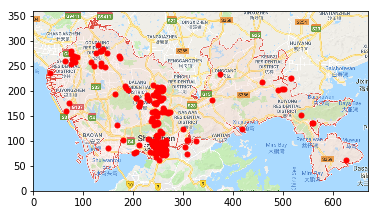

In [11]:
import matplotlib.pyplot as plt

def calcAngle(x,y):
    R = 6373.0

    dlon = radians(y[1] - x[1])
    dlat = radians(y[0] - x[0])
    a = cos(radians(y[0]))*sin(dlon)
    b = cos(radians(x[0]))*sin(radians(y[0])) - sin(radians(x[0]))*cos(radians(y[0]))*cos(dlon)
    c = atan2(a,b)
    return c


img = plt.imread("map-shenzhen.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,671,0,361])

zero_point = [22.428111, 113.724586]
endx = [22.423773, 114.650691]
xaxis = calcDist(zero_point, endx)
endy = [22.871618, 113.715715]
yaxis = calcDist(zero_point, endy)

rddcoord = coordErbs.map(lambda x: (x[0],(x[1],x[2],x[3])))

final=rddHandover.collect()
for i in final:
    coord = rddcoord.lookup(i[0])[0]

    r = calcDist(zero_point, coord[:2])
    alpha = calcAngle(zero_point, coord[:2])
    xcoord = r*cos(alpha)*671/xaxis
    ycoord = r*sin(alpha)*371/yaxis
    plt.plot(ycoord, xcoord, marker='o', markersize=coord[2]/200.0, color='r')

plt.show()

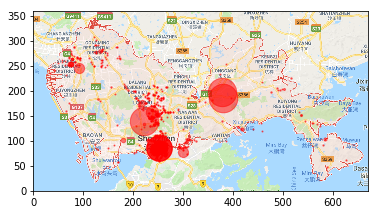

In [8]:
def hourAssign(data):
    hours = [0 for x in range(24)]
    userold = '0'
    for i in data:
        if type(i)<>type(1.0):
            hour = i.split(':')
            if len(hour)<>3:
                user = hour
                continue
            elif user <> userold:
                hours[int(hour[0])]+=1
                userold = user
        else: continue
    return hours

rddBaseAccess = rddPhoneBase.flatMapValues(lambda x: x)\
                .map(lambda x: (x[1][0],(x[0][0],x[0][1],x[1][1])))\
                .reduceByKey(lambda x,y: x+y)\
                .map(lambda x: (x[0],hourAssign(x[1])))

img = plt.imread("map-shenzhen.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,671,0,361])

final = rddBaseAccess.collect()
for i in final:
    #print(i)
    coord = rddcoord.lookup(i[0])[0]

    r = calcDist(zero_point, coord[:2])
    alpha = calcAngle(zero_point, coord[:2])
    xcoord = r*cos(alpha)*671/xaxis
    ycoord = r*sin(alpha)*371/yaxis
    plt.plot(ycoord, xcoord, marker='o', markersize=sum(i[1])/10.0 + 1, color='red', alpha=0.5)
    
#fig=plt.figure(figsize=(10, 5), dpi= 60, facecolor='w', edgecolor='k')
#plt.rcParams['figure.figsize'] = 30, 20
plt.show()

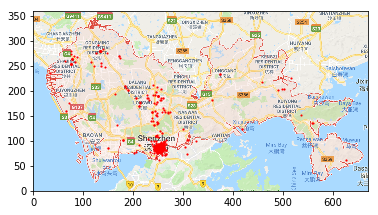

In [9]:
img = plt.imread("map-shenzhen.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,671,0,361])


rddcoord = coordErbs.map(lambda x: (x[0],(x[1],x[2],x[3])))

final=rddHandover.collect()
for i in final:
    coord = rddcoord.lookup(i[0])[0]

    r = calcDist(zero_point, coord[:2])
    alpha = calcAngle(zero_point, coord[:2])
    xcoord = r*cos(alpha)*671/xaxis
    ycoord = r*sin(alpha)*371/yaxis
    plt.plot(ycoord, xcoord, marker='o', markersize=sum(i[1])/10.0 + 1, color='r')
plt.savefig("3-teste.png")
plt.show()

In [58]:
img = plt.imread("map-shenzhen.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,671,0,361])

final = rddPhoneStr.collect()
for i in final:                    
    r = calcDist(zero_point, [float(i[2]), float(i[3])])
    alpha = calcAngle(zero_point,  [float(i[2]), float(i[3])])
    xcoord = r*cos(alpha)*671/xaxis
    ycoord = r*sin(alpha)*371/yaxis
    plt.plot(ycoord, xcoord, marker='o', markersize=2.0, color='black', alpha=0.5) #, markeredgecolor='none')


NameError: name 'plt' is not defined

In [98]:
def superPlotter(dataset, hora, padrao, metrica):
    coordErbs = loadErbs()
    rddPhoneStr = createRddDataset(hora,dataset)
    rddcoord = coordErbs.map(lambda x: (x[0],(x[1],x[2],x[3],x[4])))
    
    img = plt.imread("map-shenzhen2.png")
    fig, ax = plt.subplots()
    ax.imshow(img, extent=[0,671,0,361])

    zero_point = [22.428111, 113.724586]
    endx = [22.423773, 114.650691]
    xaxis = calcDist(zero_point, endx)
    endy = [22.871618, 113.715715]
    yaxis = calcDist(zero_point, endy)
    counter = 0

    if dataset == 'phone': cor = 'purple'
    elif dataset == 'taxi': cor = 'red'
    elif dataset == 'bus': cor='blue'
    elif dataset == 'truck': cor='green'
    
    if metrica == 'celulas':
        if padrao == 'LTE': cor = 'red'
        elif padrao == 'GSM': cor = 'blue'
        elif padrao == 'UMTS': cor='green'
        
        f = open('shenzen-erbs.csv')
        for i in f:
            line = i.strip('\n').split(',')
            r = calcDist(zero_point, [float(line[7]), float(line[6])])
            alpha = calcAngle(zero_point,  [float(line[7]), float(line[6])])
            xcoord = r*cos(alpha)*671/xaxis
            ycoord = r*sin(alpha)*371/yaxis
            r = float(line[8])*67.1/95000
            if line[0] == padrao:
                plt.plot(ycoord, xcoord, marker='o', markersize=r, color=cor, alpha=0.2)

    elif metrica == 'usuarios':
        rddPhoneBase = rddPhoneStr.cartesian(coordErbs)\
                        .filter(lambda x: calcDist((x[0][2],x[0][3]),(x[1][1],x[1][2])) < (x[1][3]))\
                        .map(lambda x: ((x[0][0],x[0][1]),[(x[1][0],calcDist((x[0][2],x[0][3]),(x[1][1],x[1][2])))]))\
                        .reduceByKey(lambda x,y: sorted(x+y, key=lambda z: z[1])[:3])
        rddBaseAccess = rddPhoneBase.flatMapValues(lambda x: x)\
                        .map(lambda x: (x[1][0],(x[0][0],x[0][1],x[1][1])))\
                        .reduceByKey(lambda x,y: x+y)\
                        .map(lambda x: (x[0],hourAssign(x[1])))
        
        final = rddBaseAccess.collect()
        for i in final:
            coord = rddcoord.lookup(i[0])[0]

            r = calcDist(zero_point, coord[:2])
            alpha = calcAngle(zero_point, coord[:2])
            xcoord = r*cos(alpha)*671/xaxis
            ycoord = r*sin(alpha)*371/yaxis
            r = sum(i[1])*10/sum(max(final, key=lambda x: sum(x[1]))[1])
            if padrao=='none':
                plt.plot(ycoord, xcoord, marker='o', markersize=r, color=cor, alpha=0.5)
            elif padrao==coord[3]:
                plt.plot(ycoord, xcoord, marker='o', markersize=r, color=cor, alpha=0.5)

    elif metrica == 'handover':
        rddPhoneBase2 = rddPhoneBase.map(lambda x: (x[0][0],[(x[0][1],x[1])]))\
                        .reduceByKey(lambda x,y: sorted(x+y, key=lambda z: z[0].strip(":")))
        rddHandover = rddPhoneBase2.values().map(lambda x: handoverAssign(x)).coalesce(1)\
                     .flatMap(lambda x: x).reduceByKey(lambda x,y: x+y)\
                     .map(lambda x: (x[0],hourAssign3(x[1])))
        final=rddHandover.collect()
        for i in final:
            coord = rddcoord.lookup(i[0])[0]

            r = calcDist(zero_point, coord[:2])
            alpha = calcAngle(zero_point, coord[:2])
            xcoord = r*cos(alpha)*671/xaxis
            ycoord = r*sin(alpha)*371/yaxis
            r = sum(i[1])*10/sum(max(final, key=lambda x: sum(x[1]))[1])
            if padrao=='none':
                plt.plot(ycoord, xcoord, marker='o', markersize=r, color=cor, alpha=0.5) #, markeredgecolor='none')
            elif padrao==coord[3]:
                plt.plot(ycoord, xcoord, marker='o', markersize=r, color=cor, alpha=0.5) #, markeredgecolor='none')
                
    elif metrica == 'posicoes':
        final = rddPhoneStr.collect()
        for i in final:
            r = calcDist(zero_point, [float(i[2]), float(i[3])])
            alpha = calcAngle(zero_point,  [float(i[2]), float(i[3])])
            xcoord = r*cos(alpha)*671/xaxis
            ycoord = r*sin(alpha)*371/yaxis
            plt.plot(ycoord, xcoord, marker='o', markersize=2.0, color=cor, alpha=0.5)  
            
    plt.show()

In [105]:
x_widget = widgets.IntSlider(min=0, max=23, step=1, description='Hora')
w_widget = widgets.Dropdown(options=['phone','taxi','bus','truck'],value='phone',description='Dataset:',disabled=False)
y_widget = widgets.Dropdown(options=['none','LTE','GSM','UMTS'],value='none',description='Padrao:',disabled=False)
z_widget = widgets.Dropdown(options=['celulas','usuarios','handover','posicoes']\
                            ,value='usuarios',description='Metrica:',disabled=False)

def att(x):
    if x < 10:
        return '0'+str(x)
    return str(x)

def printer(x):
    return(x)
    
hora = interactive(att, x=x_widget)
dataset = interactive(printer, x=w_widget) #['phone','taxi','bus','truck'], description='Dataset')
padrao = interactive(printer, x=y_widget) #['none','LTE','GSM','UMTS'], description='Padra de Radio')
metrica = interactive(printer, x=z_widget) #[['celulas','usuarios','handover','posicoes'], description='Metrica do Plot')

display(hora)
display(dataset)
display(padrao)
display(metrica)

def on_button_clicked(b):
    superPlotter(dataset.result, hora.result, padrao.result, metrica.result)
      

button = widgets.Button(description='submeter!')
display(button)
button.on_click(on_button_clicked)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGlvbj11J0hvcmEnLCBtYXg9MjMpLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz0odSd3aWRnZXQtaW50ZXLigKY=


aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnRGF0YXNldDonLCBvcHRpb25zPSgncGhvbmUnLCAndGF4aScsICdidXMnLCAndHJ1Y2snKSwgdmFsdWU9J3Bob27igKY=


aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnUGFkcmFvOicsIG9wdGlvbnM9KCdub25lJywgJ0xURScsICdHU00nLCAnVU1UUycpLCB2YWx1ZT0nbm9uZScpLCDigKY=


aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnTWV0cmljYTonLCBpbmRleD0xLCBvcHRpb25zPSgnY2VsdWxhcycsICd1c3VhcmlvcycsICdoYW5kb3ZlcicsICfigKY=


Button(description=u'submeter!', style=ButtonStyle())